In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Let's reload the updated dataset and prepare the data for a line plot showing the mean accuracy for each 'aug_num'.
updated_runs_df = pd.read_csv('./concat_0.1.csv', converters={'summary': ast.literal_eval, 'config': ast.literal_eval})

In [3]:
updated_runs_df

,Unnamed: 0,summary,config,name
0,0,"{'val/acc_best': 0.43748000264167786, 'train/a...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",serene-sun-26
1,1,"{'_wandb': {'runtime': 178145}, 'val/acc_top2'...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",toasty-snowball-25
2,2,"{'val/acc_top1': 0.3830200135707855, 'trainer/...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",swept-snowball-24
3,3,"{'train/acc_top1': 0.999918818473816, 'train/a...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",fluent-glade-23
4,4,"{'train/loss': 0.0003464947221800685, 'train/a...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",scarlet-grass-22
5,5,"{'val/acc_top2': 0.5103800296783447, '_wandb':...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",fast-sound-21
6,6,"{'_wandb': {'runtime': 262658}, 'val/loss': 0....","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",trim-monkey-20
7,7,"{'_step': 65, 'epoch': 32, '_wandb': {'runtime...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",super-capybara-19
8,8,"{'_wandb': {'runtime': 91441}, 'val/acc_best':...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",devout-shadow-18
9,9,"{'_wandb': {'runtime': 262415}, 'val/acc_best'...","{'seed': None, 'tags': ['dev'], 'ckpt_path': N...",twilight-totem-17


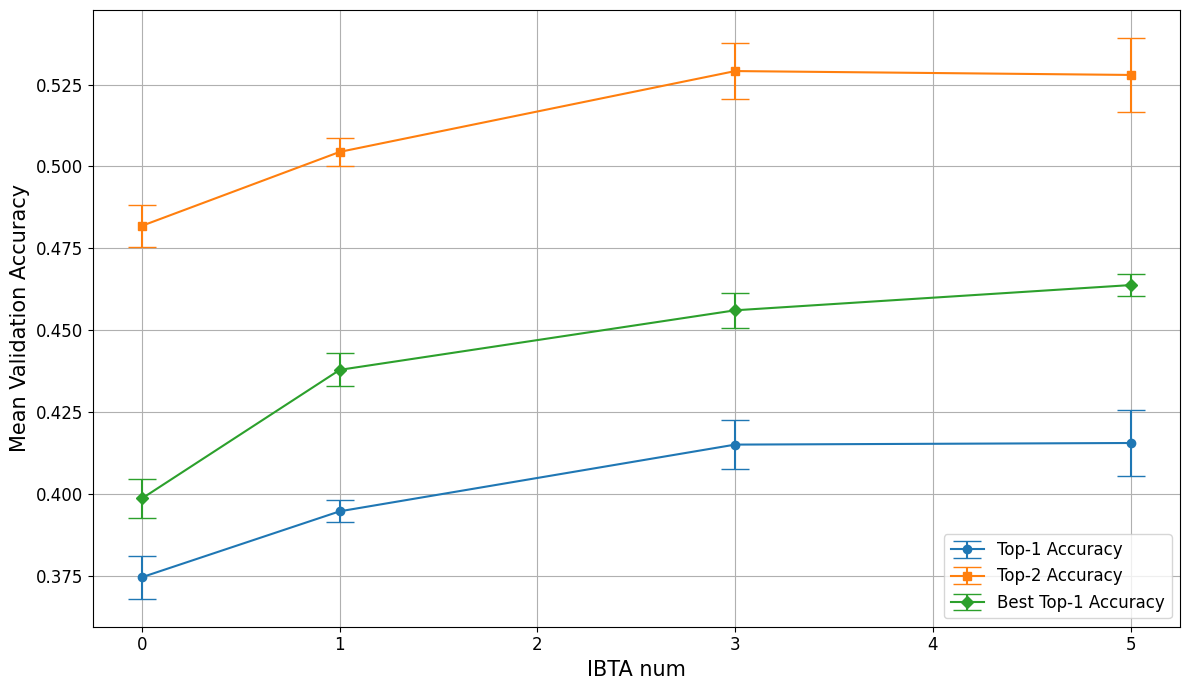

In [4]:
# Extract 'aug_num' and 'val/acc_top1' from the dictionaries
updated_runs_df['aug_num'] = updated_runs_df['config'].apply(lambda x: x.get('data/aug_num', None))
updated_runs_df['val_acc_top1'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_top1', None))
updated_runs_df['val_acc_top2'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_top2', None))
updated_runs_df['val_acc_best'] = updated_runs_df['summary'].apply(lambda x: x.get('val/acc_best', None))

# Drop rows where 'aug_num' or 'val_acc_top1' is None
updated_runs_df.dropna(subset=['aug_num', 'val_acc_top1'], inplace=True)

# Convert the 'aug_num' and 'val_acc_top1' columns to numeric types
updated_runs_df['aug_num'] = pd.to_numeric(updated_runs_df['aug_num'])
updated_runs_df['val_acc_top1'] = pd.to_numeric(updated_runs_df['val_acc_top1'])
updated_runs_df['val_acc_top2'] = pd.to_numeric(updated_runs_df['val_acc_top2'])
updated_runs_df['val_acc_best'] = pd.to_numeric(updated_runs_df['val_acc_best'])

# Calculate the mean accuracy for each 'aug_num' for both 'val_acc_top1' and 'val_acc_top2'
mean_val_acc_by_aug_top1 = updated_runs_df.groupby('aug_num')['val_acc_top1'].mean()
mean_val_acc_by_aug_top2 = updated_runs_df.groupby('aug_num')['val_acc_top2'].mean()
mean_val_acc_by_aug_best = updated_runs_df.groupby('aug_num')['val_acc_best'].mean()

# Create a DataFrame for the line plot
mean_accuracy_df = pd.DataFrame({
    'aug_num': mean_val_acc_by_aug_top1.index,
    'mean_val_acc_top1': mean_val_acc_by_aug_top1.values,
    'mean_val_acc_top2': mean_val_acc_by_aug_top2.values,
    'mean_val_acc_best': mean_val_acc_by_aug_best.values
})

# Calculate the standard deviation for each 'aug_num' for both 'val_acc_top1' and 'val_acc_top2'
std_val_acc_by_aug_top1 = updated_runs_df.groupby('aug_num')['val_acc_top1'].std()
std_val_acc_by_aug_top2 = updated_runs_df.groupby('aug_num')['val_acc_top2'].std()
std_val_acc_by_aug_best = updated_runs_df.groupby('aug_num')['val_acc_best'].std()


# Let's update the plot with the exact mean values annotated on top of each error bar.

plt.figure(figsize=(12, 7))

# Plot the lines for 'val_acc_top1' with error bars and annotate the exact mean values
top1_line = plt.errorbar(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_top1'], 
             yerr=std_val_acc_by_aug_top1, fmt='-o', label='Top-1 Accuracy', capsize=10)
# Annotate Top-1 mean values
# for x, y, std in zip(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_top1'], std_val_acc_by_aug_top1):
#     plt.text(x, y + std, f'{y:.3f}', ha='center', va='bottom')

# Plot the lines for 'val_acc_top2' with error bars and annotate the exact mean values
top2_line = plt.errorbar(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_top2'], 
             yerr=std_val_acc_by_aug_top2, fmt='-s', label='Top-2 Accuracy', capsize=10)
# Annotate Top-2 mean values
# for x, y, std in zip(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_top2'], std_val_acc_by_aug_top2):
#     plt.text(x, y + std, f'{y:.3f}', ha='center', va='bottom')
    
# Plot the lines for 'val_acc_best' with error bars and annotate the exact mean values
best_line = plt.errorbar(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_best'], 
             yerr=std_val_acc_by_aug_best, fmt='-D', label='Best Top-1 Accuracy', capsize=10)
# Annotate Top-2 mean values
# for x, y, std in zip(mean_accuracy_df['aug_num'], mean_accuracy_df['mean_val_acc_best'], std_val_acc_by_aug_best):
#     plt.text(x, y + std, f'{y:.3f}', ha='center', va='bottom')

# Add the title and labels
# plt.title('Mean Top-1 and Top-2 Validation Accuracy with Error Bars by Augmentation Number')
plt.xlabel('IBTA num', fontsize=15)
plt.ylabel('Mean Validation Accuracy', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the legend
plt.legend(handles=[top1_line, top2_line, best_line], loc='lower right', fontsize='large')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
